# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df = clean_hospital_read_df.copy()
clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

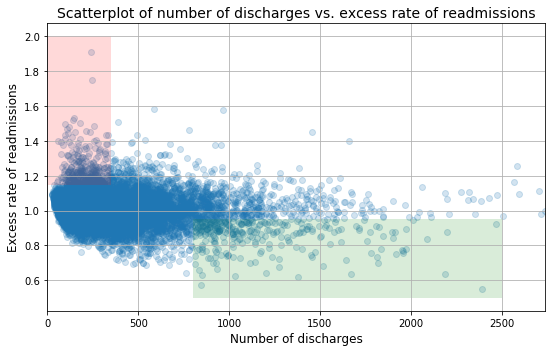

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

The Pearson correlation coefficient between Number of Discharges and Excess Readmission Ratio is: -0.09


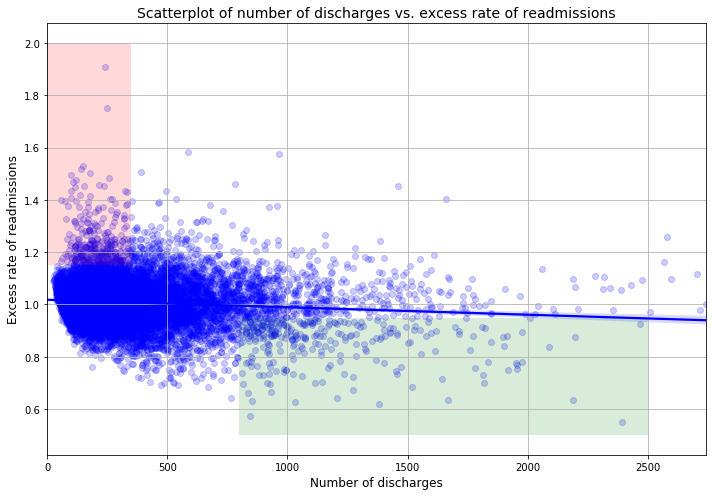

In [5]:
# create plot as above but add a regression line and calculate pearson correlation coefficient.
import seaborn as sns

fig, ax = plt.subplots(figsize=[10,7])
sns.regplot(x, y, ax=ax, color='b', scatter_kws={'alpha':0.2}) # regression plot and add regression line

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout();

# pearson corr coeff
print('The Pearson correlation coefficient between Number of Discharges and Excess Readmission Ratio is: {:.2f}'.format(np.corrcoef(x,y)[0,1]))

No. The initial observation found that, in overall, the rate of readmissions is trending down with increasing number of discharges and concluded that there is a significant correlation between hospital capacity (number of discharges) and excess readmission ratios. The regulatory policy recommendations were made based on this conclusion. However the scatterplot didn't show strong correlation between hospital capacity (number of discharges) and excess readmission ratios. The statistical analysis only have descriptive statistics for two arbitraryly assigned groups. No hypothesis tests were carried out to test the relationship. Next I will pick two groups (< 100 and > 1000 number of discharges) to run hypothesis test.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

In [6]:
n1 = 100
n2 = 1000
clean_hospital_read_df_1 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 0]

df1 = clean_hospital_read_df_1[clean_hospital_read_df_1['Number of Discharges'] < n1]
df2 = clean_hospital_read_df_1[clean_hospital_read_df_1['Number of Discharges'] > n2]

print(df1.shape)
print(df2.shape)

(1188, 12)
(463, 12)


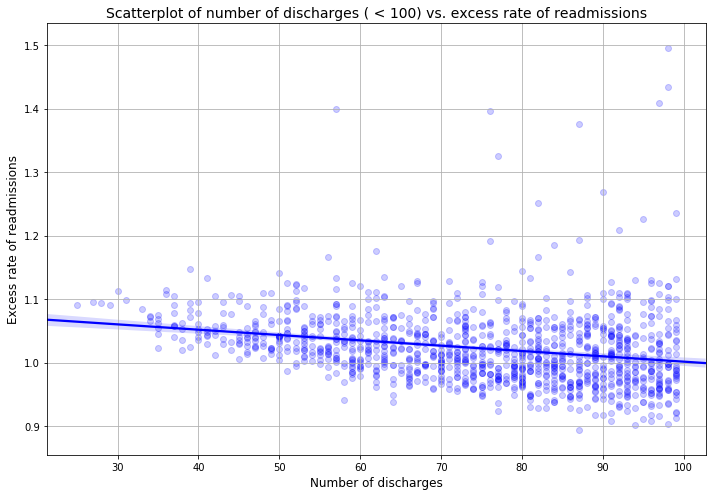

In [7]:
fig, ax = plt.subplots(figsize=[10,7])
sns.regplot(df1['Number of Discharges'], df1['Excess Readmission Ratio'], ax=ax, color='b', scatter_kws={'alpha':0.2}) # regression plot and add regression line

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges ( < {}) vs. excess rate of readmissions'.format(n1), fontsize=14)

ax.grid(True)
fig.tight_layout()

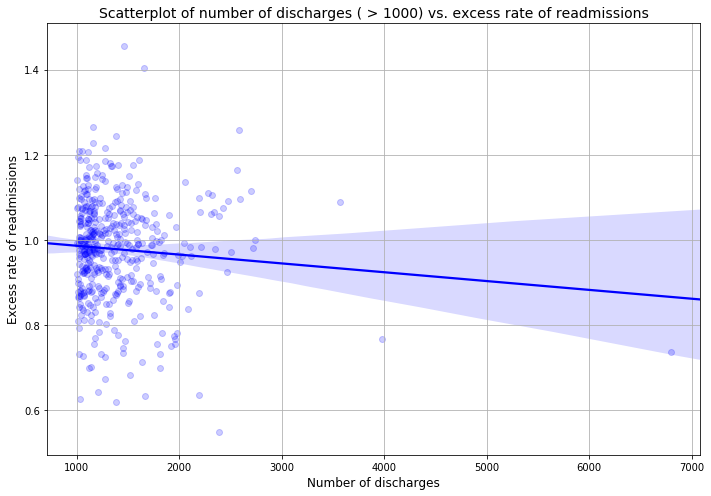

In [8]:
fig, ax = plt.subplots(figsize=[10,7])
sns.regplot(df2['Number of Discharges'], df2['Excess Readmission Ratio'], ax=ax, color='b', scatter_kws={'alpha':0.2}) # regression plot and add regression line

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges ( > {}) vs. excess rate of readmissions'.format(n2), fontsize=14)

ax.grid(True)
fig.tight_layout()

**Null hypothesis**: there is no significant difference in mean excess readmission rates bewteen the small (< 100) and large (> 1000) discharge groups. 

T-test and non-parametric test will be used. 

In [9]:
# 1. compare the difference of the average excess readmission ratios in each group

# concatnate two data and do permutation, then seperate them to two new data
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates
    
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = np.mean(df1['Excess Readmission Ratio']) - np.mean(df2['Excess Readmission Ratio'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(df1['Excess Readmission Ratio'], df2['Excess Readmission Ratio'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value of permutation test is ', p)

p-value of permutation test is  0.0


In [10]:
from scipy import stats
t, p = stats.ttest_ind(df1['Excess Readmission Ratio'], df2['Excess Readmission Ratio'])
print('p-value of t-test is', p)

p-value of t-test is 3.778753923341558e-23


In [11]:
# 2. compare the difference of the average excess readmission in each group
df1 = df1.copy()
df2 = df2.copy()
df1.loc[:,'Excess Readmission']=df1['Excess Readmission Ratio'].apply(lambda x: 1 if x>=1 else 0)
df2.loc[:,'Excess Readmission']=df2['Excess Readmission Ratio'].apply(lambda x: 1 if x>=1 else 0)

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = np.mean(df1['Excess Readmission']) - np.mean(df2['Excess Readmission'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(df1['Excess Readmission'], df2['Excess Readmission'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value of permutation test is ', p)

p-value of permutation test is  0.0


In [12]:
from scipy import stats
t, p = stats.ttest_ind(df1['Excess Readmission'], df2['Excess Readmission'])
print('p-value of t-test is', p)

p-value of t-test is 1.984999746849863e-12


Both non-parametic test and t-test result in very low $p$ values and we conclude the average excess readmission ratio is different between the groups (one with < 100 number of discharges and one with > 1000 number of discharges).

**Statistical significance**: refers to the unlikelihood that the test statistic observed in the sample occurs simply by coincidence. **Practical significance**: deals with taking a decisions based on the outcome of the test statistics, factoring in all real work challenges and constraints. Practical significance depends upon many external factors like cost, time, objective, etc. **Statistical vs. Practical significance**: Statistical significance does not guarantee practical significance, but to be practically significant, a data must be statistically significant.

The advantage of using the original scatter plot to convey information is that the dispersion of points in the scatterplot reveals the relationships between two numerical variables.
The disadvantage is that the points get overlapped for numer of discharges < 1000, and it doesn't clearly support the assertion that there is a declining trend.

Add linear regression line, remove arbitrary color shades to the original scatter plot to make the message clearer. 

The Pearson correlation coefficient between Number of Discharges and Excess Readmission Ratio is: -0.09


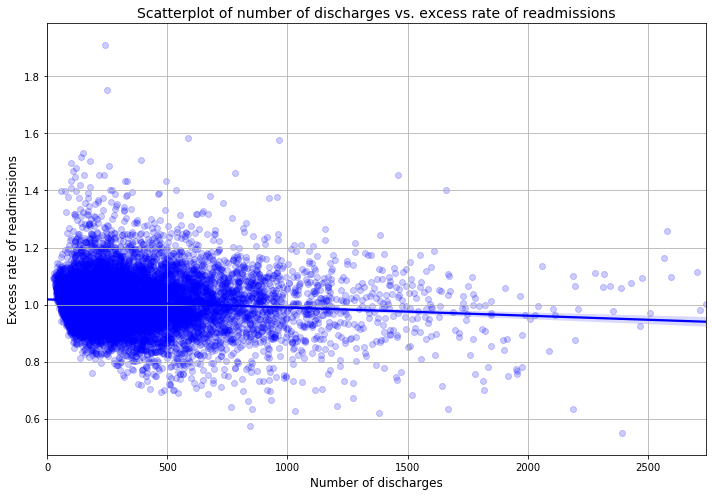

In [13]:
# create plot as above but add a regression line and calculate pearson correlation coefficient.
import seaborn as sns

fig, ax = plt.subplots(figsize=[10,7])
sns.regplot(x, y, ax=ax, color='b', scatter_kws={'alpha':0.2}) # regression plot and add regression line

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout();

# pearson corr coeff
print('The Pearson correlation coefficient between Number of Discharges and Excess Readmission Ratio is: {:.2f}'.format(np.corrcoef(x,y)[0,1]))